**Importing the libraries and Data Set**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("/content/Mall_Customers.csv")

**Exploratory Data Analysis**

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.drop(["CustomerID"] , axis=1, inplace=True)

In [8]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Data Visualization**

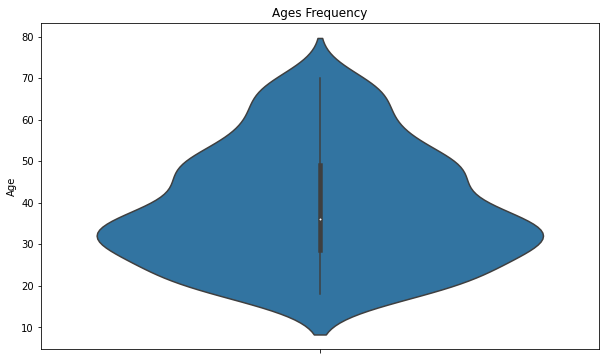

In [10]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=dataset["Age"])
plt.show()

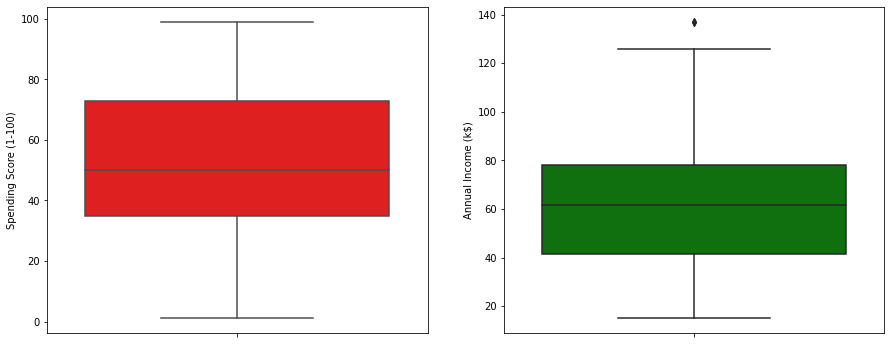

In [12]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dataset["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=dataset["Annual Income (k$)"], color="green")
plt.show()

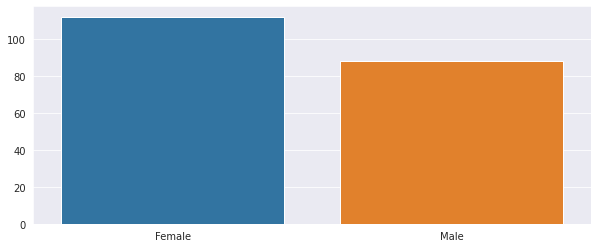

In [13]:
genders = dataset.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

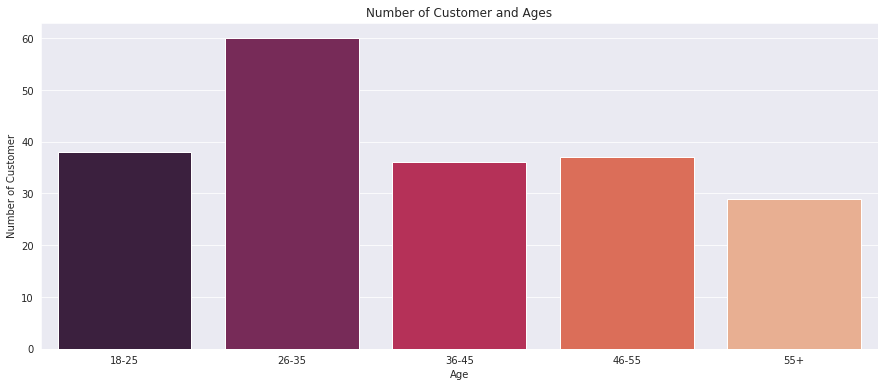

In [15]:
age18_25 = dataset.Age[(dataset.Age <= 25) & (dataset.Age >= 18)]
age26_35 = dataset.Age[(dataset.Age <= 35) & (dataset.Age >= 26)]
age36_45 = dataset.Age[(dataset.Age <= 45) & (dataset.Age >= 36)]
age46_55 = dataset.Age[(dataset.Age <= 55) & (dataset.Age >= 46)]
age55above = dataset.Age[dataset.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

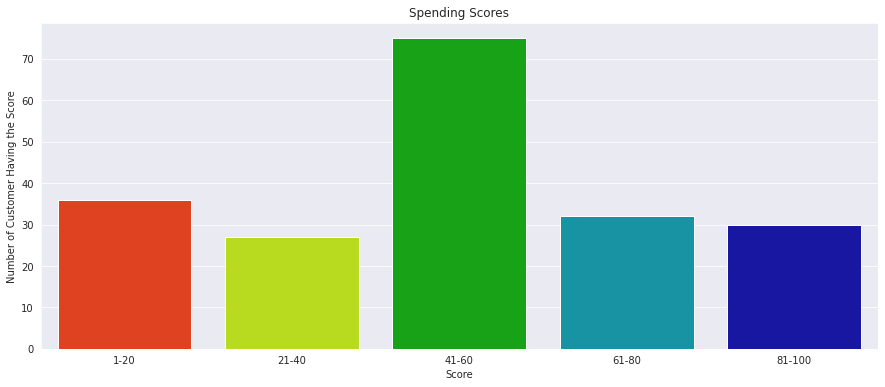

In [16]:
ss1_20 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 1) & (dataset["Spending Score (1-100)"] <= 20)]
ss21_40 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 21) & (dataset["Spending Score (1-100)"] <= 40)]
ss41_60 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 41) & (dataset["Spending Score (1-100)"] <= 60)]
ss61_80 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 61) & (dataset["Spending Score (1-100)"] <= 80)]
ss81_100 = dataset["Spending Score (1-100)"][(dataset["Spending Score (1-100)"] >= 81) & (dataset["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

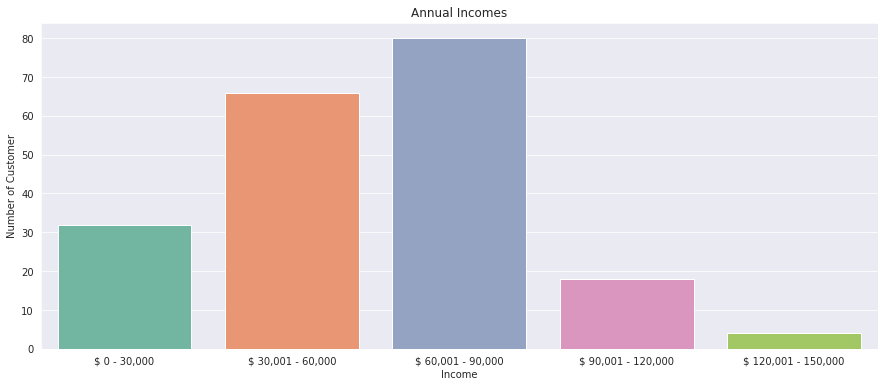

In [17]:
ai0_30 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 0) & (dataset["Annual Income (k$)"] <= 30)]
ai31_60 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 31) & (dataset["Annual Income (k$)"] <= 60)]
ai61_90 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 61) & (dataset["Annual Income (k$)"] <= 90)]
ai91_120 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 91) & (dataset["Annual Income (k$)"] <= 120)]
ai121_150 = dataset["Annual Income (k$)"][(dataset["Annual Income (k$)"] >= 121) & (dataset["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

In [18]:
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 3].values

**Splitting Dataset into train and test dataset**

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Feature Scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Elbow method to find the optimal number of clusters**

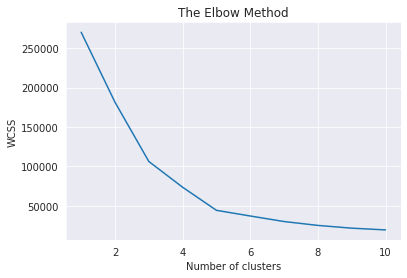

In [31]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Fitting K-Means to dataset**

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

**Visualizing the Clusters**

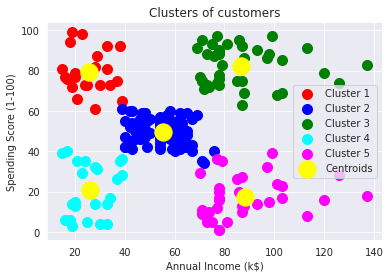

In [33]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()